lets start the project Keep going

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('yield_df.csv')

In [4]:
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

we need to delete unnecassary cloumn

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [7]:
df.shape

(28242, 7)

checking for null values

In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [10]:
df.duplicated().sum()

2310

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  25932.000000   25932.000000                   25932.000000   
mean    2001.556455   76978.132925                    1146.836688   
std        7.055924   84647.605552                     717.391098   
min     1990.000000      50.000000                      51.000000   
25%     1995.000000   19996.000000                     593.000000   
50%     2001.000000   39530.000000                    1083.000000   
75%     2008.000000  104168.000000                    1668.000000   
max     2013.000000  501412.000000                    3240.000000   

       pesticides_tonnes      avg_temp  
count       25932.000000  25932.000000  
mean        34782.573241     20.422251  
std         57228.568244      6.439402  
min             0.040000      1.300000  
25%          1597.000000     16.580000  
50%         15373.000000     21.420000  
75%         45620.000000     26.060000  
max        367778.000000     30.650000

In [14]:
# transforming the  avg_rain_fall col
df['average_rain_fall_mm_per_year']


0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

Below is used to drop the row which has  strings like "N/A" and retain the float values in the avg_rain_fall_mm_per_year

In [15]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [16]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [17]:
to_drop

Index([], dtype='int64')

In [18]:
df.drop(to_drop)

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[25932 rows x 7 columns]

In [21]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64) # to make this column to become float type as datatype

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.6+ MB


Graph freuency versus area

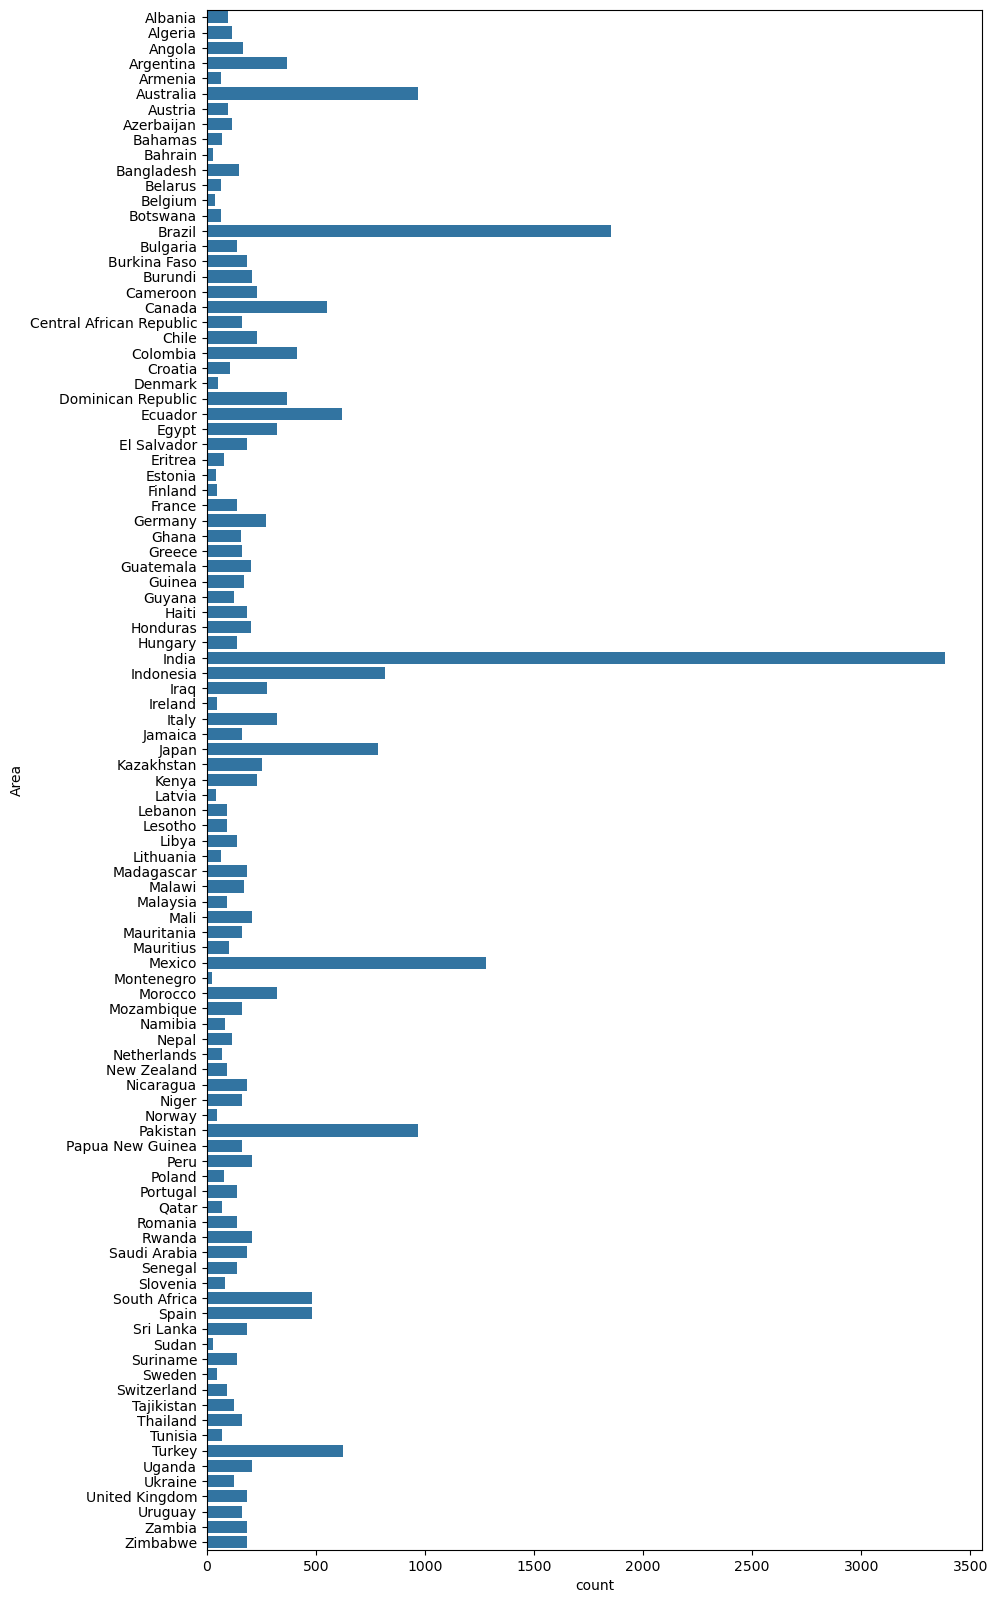

In [20]:
plt.figure(figsize=(10,20)) #hieght and width
sns.countplot(y=df['Area'])
plt.show()


Yield_per_country

In [24]:
df['Area'].head

<bound method NDFrame.head of 0         Albania
1         Albania
2         Albania
3         Albania
4         Albania
           ...   
28237    Zimbabwe
28238    Zimbabwe
28239    Zimbabwe
28240    Zimbabwe
28241    Zimbabwe
Name: Area, Length: 25932, dtype: object>

In [28]:
country=len(df['Area'].unique())
print(country)

101


In [36]:
country=(df['Area'].unique())
country


array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [35]:
for state in country:
    print(state)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [38]:
df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [39]:
# yeild per country
yeild_per_country=[]
for state in country:
    yeild_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [40]:
yeild_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 